# Tipos de datos, marcadores para gráficas y canales de codificación visual

Una visualización representa los datos utilizando una colección de marcadores de gráficas (_graphical marks_) (barras, líneas, puntos, etc.). Los atributos de un marcador &mdash; como su posición, forma, tamaño o color &mdash; sirven como canales (_channels_) a través de los cuales podemos codificar los valores de los datos subyacentes.

Con un marco básico de tipos de datos (_data types_), marcadores (_marks_) y canales de codificación (_encoding channels_), podemos crear una gran variedad de visualizaciones de forma concisa. En este *notebook*, exploramos cada uno de estos elementos y mostramos cómo utilizarlos para crear gráficos estadísticos personalizados.

_Este notebook es una traduccion y modificación del notebook **"Introduction to Vega-Lite / Altair"** , el cual es parte de [data visualization curriculum](https://github.com/uwdata/visualization-curriculum)._

_Todos los notebooks en español se encuentran en: [Altair en Simplificando Datos](https://github.com/SimplificandoDatos/Altair)_

In [1]:
import pandas as pd
import altair as alt

## Datos sobre el desarrollo mundial


Visualizaremos datos de la salud y de la población muncdial para un número de paises, en el periodo de 1955 a 2005. Los datos fueron recogido por la [Fundación Gapminder](https://www.gapminder.org/) y compartido en la [popular charla de Hans Rosling's en TED](https://www.youtube.com/watch?v=hVimVzgtD6w). ¡Si no has visto la charla,  te animanos a que lo hagas antes de continuar!

Primero cargaremos los datos desde la colección de [vega-datasets](https://github.com/vega/vega-datasets) a un *data frame* de Pandas.

In [2]:
from vega_datasets import data as vega_data
data = pd.read_json(vega_data.gapminder.url)

¿Qué tan grande es el conjunto de datos?

In [3]:
data.shape

(693, 6)

¡693 filas y 6 columnas!

Demos un vistazo al contenido de los datos:

In [4]:
data.head(5)

,cluster,country,fertility,life_expect,pop,year
0,0,Afghanistan,7.7,30.332,8891209,1955
1,0,Afghanistan,7.7,31.997,9829450,1960
2,0,Afghanistan,7.7,34.020,10997885,1965
3,0,Afghanistan,7.7,36.088,12430623,1970
4,0,Afghanistan,7.7,38.438,14132019,1975


Para cada país (`country`) y año (`year`), en intervalos de 5 años, tenemos medidas de la fertilidad en términos del número de hijos por mujer (`fertility`), esperanza de vida en años (`life_expect`) y población total (`pop`).

También vemos un campo `cluster` con un código entero. ¿Qué podría representar esto? ¡Intentaremos resolver este misterio mientras visualizamos los datos!

Vamos a crear un *data frame* más pequeño, filtrado sólo con los valores del año 2000:

In [5]:
data2000 = data.loc[data['year'] == 2000]

In [6]:
data2000.head(5)

,cluster,country,fertility,life_expect,pop,year
9,0,Afghanistan,7.4792,42.129,23898198,2000
20,3,Argentina,2.3500,74.340,37497728,2000
31,3,Aruba,2.1240,73.451,69539,2000
42,4,Australia,1.7560,80.370,19164620,2000
53,1,Austria,1.3820,78.980,8113413,2000


## Tipos de datos


El primer ingrediente en una visualización efectiva son los datos de entrada. Los valores de los datos pueden representar diferentes formas de medición. ¿Qué tipo de comparaciones soportan esas mediciones? ¿Y qué tipo de codificaciones visuales apoyan esas comparaciones?

Comenzaremos mirando los tipos de datos básicos que Altair utiliza para informar las opciones de codificación visual. Estos tipos de datos determinan los tipos de comparaciones que podemos hacer, y por lo tanto guían nuestras decisiones de diseño de visualización.

### Nominal (N)

Los datos del tipo *Nominal* (también llamados *categóricos* -*categorical*-) consisten en nombres de categorías.

Con datos nominales podemos comparar la igualdad de valores: *¿Es el valor A igual o diferente al valor B? (A = B)*, afirmaciones como "A es igual a B" o "A no es igual a B". En el conjunto de datos anterior, el campo `country` es nominal.

Al visualizar los datos nominales deberíamos ver fácilmente si los valores son iguales o diferentes: posición, tonalidad de color (azul, rojo, verde, *etc.*), y forma pueden ayudar. Sin embargo, el uso de un canal de tamaño para codificar datos nominales podría inducirnos a error, sugiriendo diferencias de rango o magnitud entre valores que no existen.

### Ordinal (O)

Datos del tipo *Ordinal* consisten de valores que tienen un orden específico.

Con los datos ordinales podemos comparar el orden de clasificación de los valores: *¿El valor A es anterior o posterior al valor B? (A < B)*, apoyando afirmaciones como "A es menor que B" o "A es mayor que B". En el conjunto de datos anterior, podemos tratar el campo `year` como ordinal.

Cuando visualizamos datos ordinales, debemos percibir un sentido de orden. La posición, el tamaño o el valor del color (brillo) podrían ser apropiados, ya que el tono del color (que no está ordenado perceptiblemente) sería menos apropiado.

### Cuantitativo (Q)

Con datos del tipo *Cuantitavo* (*quantitative*) podemos medir diferencias númericas entre valores. Hay varios subtipos de datos cuantitativos:

Para los datos de *intervalo* (*interval*) podemos medir la distancia (intervalo) entre puntos: *¿Cuál es la distancia entre el valor A y el valor B? (A - B)*, apoyando afirmaciones como "A está a 12 unidades de B".

Para los datos de *proporción* (*ratio*) el punto cero es significativo y por lo tanto también podemos medir proporciones o factores de escala: *Qué proporción del valor B es el valor B? (A / B)*, apoyando afirmaciones como "A es el 10% de B" o "B es 7 veces mayor que A".


En el conjunto de datos anterior, `year` es un campo de intervalo cuantitativo (el valor del año "cero" es subjetivo), mientras que `fertiltility` y `life_expect` son campos cuantitativo de proporciones (el cero es significativo para el cálculo de las proporciones).
Vega-Lite representa datos cuantitativos, pero no distingue entre los tipos de intervalos y proporciones.

Los valores cuantitativos pueden ser visualizados usando valores de posición, tamaño o color, entre otros canales. Un eje con una línea de base cero es esencial para las comparaciones de los valores proporcionales, pero puede omitirse con seguridad para las comparaciones de intervalos.

### Temporal (T)

Valores del tipo *Temporal* miden puntos o intervalos de tiempo. Este tipo es un caso especial de valores cuantitativos (estampa de tiempo -*timestamps*-) con una rica semántica y convenciones(ejemplo [Calendario Gregoriano](https://es.wikipedia.org/wiki/Calendario_gregoriano)). El tipo temporal en Vega-Lite soporta el razonamiento sobre las unidades de tiempo (año, mes, día, hora, etc.), y proporciona métodos para solicitar intervalos de tiempo específicos.

Ejemplo de valores temporales incluyen caracteres de fechas como `“2019-01-04”` y `“Jan 04 2019”`, así como fechas y horas estandarizadas como la [El formato ISO para fechas y horas](https://es.wikipedia.org/wiki/ISO_8601): `“2019-01-04T17:50:35.643Z”`.

No hay valores temporales en nuestros datos sobre el desarrollo mundial, ya que el campo `year` simplemente se codifica como un número entero. Para más detalles de como usar datos temporales en Altair, ver [Times and Dates documentation](https://altair-viz.github.io/user_guide/times_and_dates.html).

### Resumen

Estos tipos de datos no son mutuamente excluyentes, sino que forman una jerarquía: los datos ordinales soportan comparaciones nominales (igualdad), mientras que los datos cuantitativos soportan comparaciones ordinales (orden de clasificación).

Además, estos tipos de datos _no_ proporcionan una categorización fija. ¡El hecho de que un campo de datos se represente utilizando un número no significa que tengamos que tratarlo como un tipo cuantitativo! Por ejemplo, podemos interpretar un conjunto de edades (10 años, 20 años, etc.) como nominal (menor o mayor de edad), ordinal (agrupado por año) o cuantitativo (calcular la edad promedio).

¡Ahora vamos a examinar cómo codificar visualmente estos tipos de datos!

## Codificadores de canales (Encoding Channels)

En el corazón de Altair está el uso de *codificaciones (encodings)* que vinculan los campos de datos (con un determinado tipo de datos) a los *canales (channels)* de codificación disponibles de un tipo de *marcador (mark)* elegido. En este *notebook* examinaremos los siguientes canales de codificación:

- `x`: Posición horizontal de los marcadores (eje x).
- `y`: Posición vertical de los marcadores (eje y).
- `size`: Tamaño del marcador. Podría corresponder a área o longitud, dependiendo del tipo de marcador.
- `color`:Color del marcador, especícad como un [Código de color CSS](https://htmlcolorcodes.com/es/nombres-de-los-colores).
- `opacity`: Opacidad del marcador, que va desde 0 (totalmente transparente) a 1 (totalmente opaco).
- `shape`: Trazado de la forma del símbolo para los marcadores tipo `point`.
- `tooltip`: Texto del puntero para mostrar al pasar el ratón por encima del marcador.
- `order`: Ordenar los marcadores, determina el orden de los puntos de línea o de área y el orden de los dibujos.
- `column`: Coloca los datos en subgráficas (*subplots*) alineadas horizontalmente.
- `row`: Coloca los datos en subgráficas (*subplots*) alineadas verticalmente.

Para una lista completa de los canales disponibles, ver [Altair encoding documentation](https://altair-viz.github.io/user_guide/encoding.html).

### X

El canal de codificación `x` fija la posición horizontal de un marcador (coordenada x). Además, las opciones predeterminadas de eje y título se realizan automáticamente. En la siguiente gráfica, la elección de un tipo de datos cuantitativos da como resultado un eje de escala lineales continua:

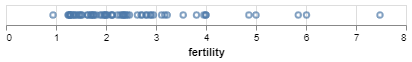

In [7]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q')
)

### Y

El canal de codificación `y` establece la posición vertical de una marca (coordenada y). Aquí hemos añadido el campo `cluster` usando un tipo de datos ordinales (`O`). El resultado es un eje discreto que incluye una banda, con un tamaño de paso predeterminado, para cada valor único:

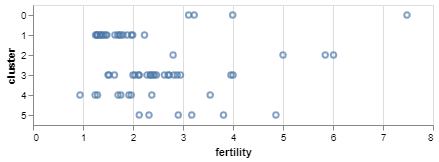

In [8]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:O')
)

_¿Qué le pasa a la gráfica anterior si intercambiamos los tipos de campo `O` y `Q`?_

Si en su lugar añadimos el campo `life_expect` como una variable cuantitativa (`Q`), el resultado es un gráfico de dispersión con escalas lineales para ambos ejes:

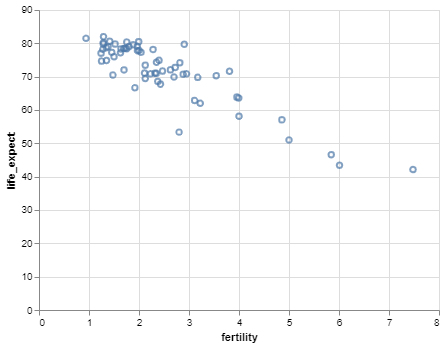

In [9]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q')
)

Por defecto, los ejes para las escalas cuantitativas lineales incluyen cero para asegurar una línea base adecuada para comparar los datos de tipo de proporción. En algunos casos, sin embargo, una línea base de cero puede carecer de sentido o puede que desee centrarse en comparaciones de intervalos. Para deshabilitar la inclusión automática de cero, configure el mapeo de escala usando el atributo `scale`:

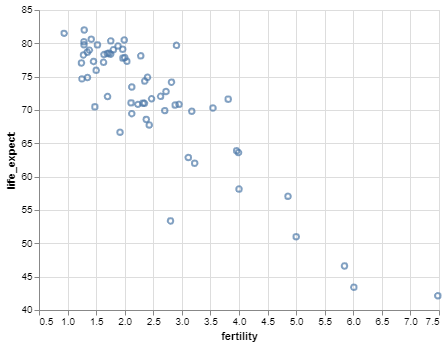

In [10]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q', scale=alt.Scale(zero=False)),
    alt.Y('life_expect:Q', scale=alt.Scale(zero=False))
)

Ahora las escalas de ejes ya no incluyen cero por defecto. Todavía queda algo de "relleno", ya que los puntos finales del dominio del eje se ajustan automáticamente a números _nice_ como múltiplos de 5 o 10.

_¿Qué pasa si también agrega `nice=False` al atributo de escala de la gráfica de arriba?_

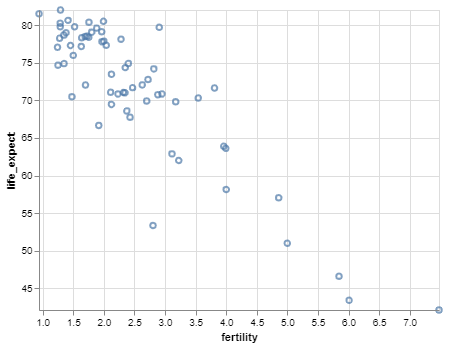

In [11]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q', scale=alt.Scale(zero=False, nice=False)),
    alt.Y('life_expect:Q', scale=alt.Scale(zero=False, nice=False))
)

### Tamaño (size)

El canal de codificación `size` establece el tamaño o la extensión de un marcador. El significado del canal puede variar en función del tipo de marcador. Para el marcador tipo `point`, el canal `size` se asigna al área de píxeles del símbolo del trazado, de modo que el diámetro del punto coincide con la raíz cuadrada del valor que asignamos al canal `size`.

Mejoremos nuestra gráfica de dispersión codificando la población (`pop`) en el canal `size`. Como resultado, el gráfico ahora también incluye una leyenda para interpretar los valores de tamaño.

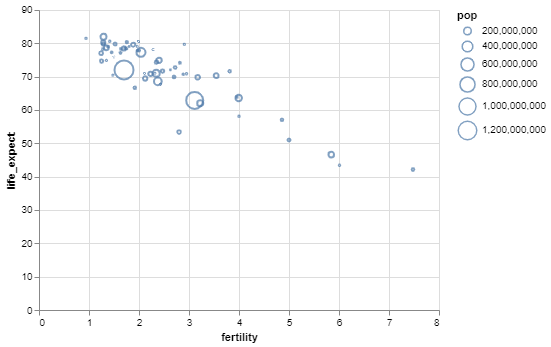

In [12]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q')
)

En algunos casos, es posible que no estemos satisfechos con el rango de tamaño predeterminado. Para proporcionar un rango personalizado de tamaños, establezca el parámetro `range` del atributo `scale` en una matriz que indique los tamaños más pequeños y más grandes. Aquí actualizamos la codificación de tamaño para que varíe de 0 píxeles (para valores cero) a 1,000 píxeles (para el valor máximo en el dominio de la escala):

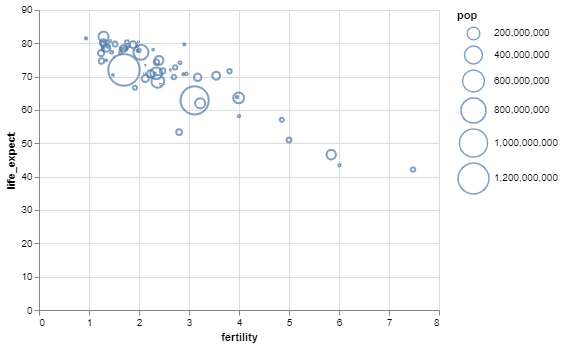

In [13]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000]))
)

### Color y opacidad (Color and Opacity)

El canal de codificación `color` establece el color de una marca. El estilo de codificación de color depende en gran medida del tipo de datos: los datos nominales utilizarán un esquema de color cualitativo de múltiples tonos, mientras que los datos ordinales y cuantitativos utilizarán gradientes de color ordenados perceptivamente.

Aquí, codificamos el campo `cluster` usando el canal `color` y un tipo de datos nominal (`N`), lo que resulta en un tono distinto para cada valor de cluster. ¿Puedes empezar a adivinar qué podría indicar el campo `cluster '?

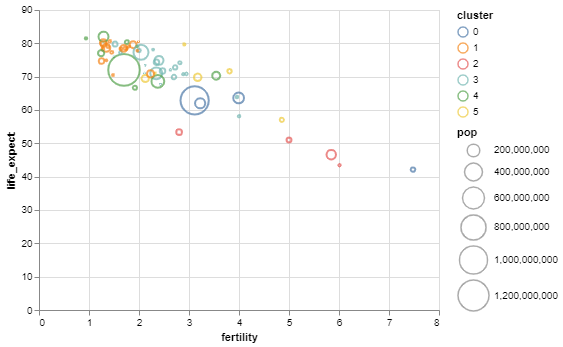

In [14]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N')
)

Si preferimos formas rellenas, podemos pasar un parámetro `filled = True` al método` mark_point`:

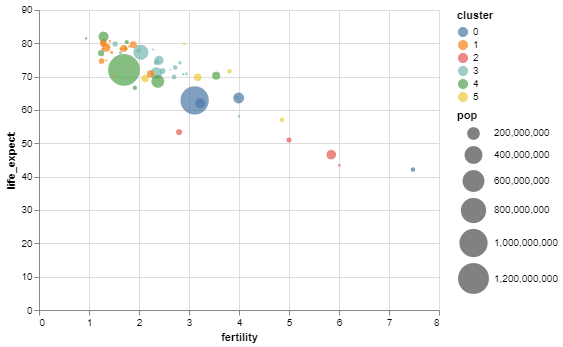

In [15]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N')
)

Por defecto, Altair utiliza un poco de transparencia para ayudar a combatir el exceso de trazado. Somos libres de ajustar aún más la opacidad, ya sea pasando un valor predeterminado al método `mark_*`, o usando un canal de codificación dedicado.

Aquí demostramos cómo proporcionar un valor constante a un canal de codificación en lugar de enlazarlo a un campo de datos:

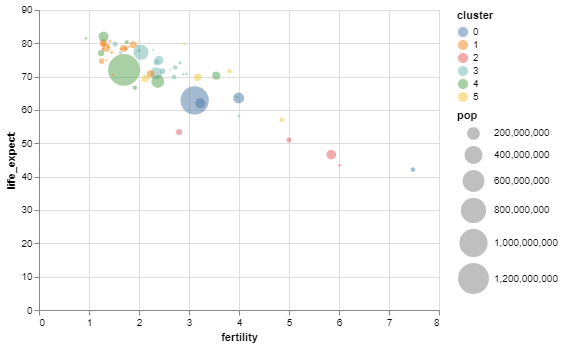

In [16]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N'),
    alt.OpacityValue(0.5)
)

### Forma (*Shape*)

El canal de codificación `shape` establece la forma geométrica utilizada por los marcadores `points`. A diferencia de los otros canales que hemos visto hasta ahora, el canal `shape` no puede ser usado por otros tipos de marcadores. El canal de codificación de formas sólo debe utilizarse con datos nominales, ya que no se admiten comparaciones perceptivas de orden y magnitud.

Codifiquemos el campo `cluster` usando tanto `shape` como `color`. El uso de múltiples canales para el mismo campo de datos subyacente se conoce como *codificación redundante*. El gráfico resultante combina información de color y forma en una sola leyenda de símbolo:

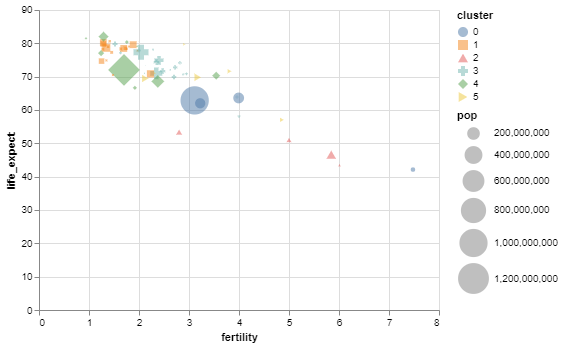

In [17]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N'),
    alt.OpacityValue(0.5),
    alt.Shape('cluster:N')
)

### Utilidades/Herramientas y ordenamiento (Tooltips & Ordering)

A estas alturas, puede que te sientas un poco frustrado: ¡Hemos creado un gráfico, pero todavía no sabemos a qué países corresponden los puntos visualizados! Añadamos utilidades interactivas para permitir la exploración.

El canal de codificación `tooltip` determina el texto de información de la herramienta que se muestra cuando un usuario mueve el cursor del ratón sobre un marcador. Añadamos una codificación de información sobre herramientas para el campo `country` y luego investiguemos qué países están siendo representados.

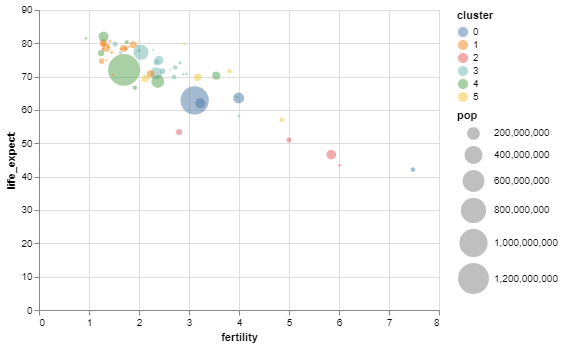

In [18]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N'),
    alt.OpacityValue(0.5),
    alt.Tooltip('country')
)

A medida que pasa el mouse, puede notar que no es posible seleccionar algunos de los puntos. Por ejemplo, el círculo azul oscuro más grande corresponde a la India, que se dibuja encima de un país con una población más pequeña, impidiendo que el ratón se mueva sobre ese país. Para solucionar este problema, podemos usar el canal de codificación `order`.

El canal de codificación `order` determina el orden de los puntos de datos, afectando tanto el orden en que se dibujan como, para los marcadores `line` y `area`, el orden en que se conectan entre sí.

Ordenemos los valores en orden descendente por la población (`pop`), asegurándonos de que los círculos más pequeños se dibujen después que los círculos más grandes:

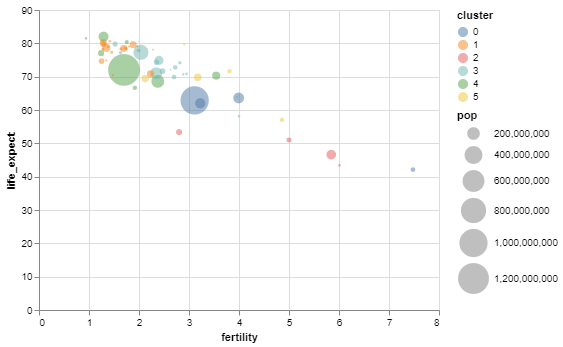

In [19]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N'),
    alt.OpacityValue(0.5),
    alt.Tooltip('country:N'),
    alt.Order('pop:Q', sort='descending')
)

Ahora podemos identificar al país más pequeño que está ocultado por la India: ¡es Bangladesh!

Ahora también podemos averiguar qué representa el campo `cluster`. Pase el ratón por encima de los distintos puntos coloreados para formular su propia explicación.

En este punto, hemos añadido información sobre herramientas que muestran sólo una propiedad del registro de datos subyacente. Para mostrar múltiples valores, podemos proporcionar al canal `tooltip` una matriz de codificaciones, una para cada campo que queremos incluir:

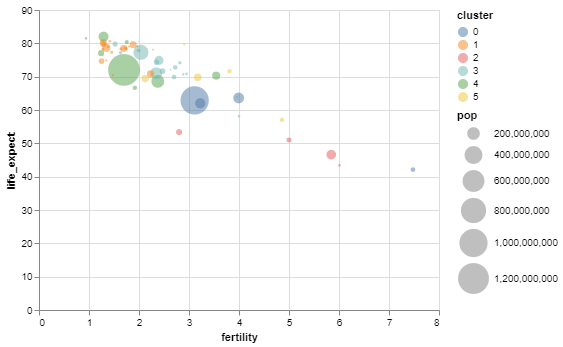

In [20]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N'),
    alt.OpacityValue(0.5),
    alt.Order('pop:Q', sort='descending'),
    tooltip = [
        alt.Tooltip('country:N'),
        alt.Tooltip('fertility:Q'),
        alt.Tooltip('life_expect:Q')
    ]   
)

¡Ahora podemos ver múltiples campos de datos al pasar el ratón!

### Facetas de columnas y filas (*Column and Row Facets*)

La posición espacial es uno de los canales más potentes y flexibles para la codificación visual, pero ¿qué podemos hacer si ya tenemos asignados los campos a los canales `x` y `y`? Una técnica valiosa es crear un *diagrama de enrejado (trellis plot)*, que consiste en subgráficos que muestran un subconjunto de los datos. Un gráfico de enrejado es un ejemplo de la técnica más general de presentar de datos utilizando vistas [*small multiples*] (https://en.wikipedia.org/wiki/Small_multiple).

Los canales de codificación `column` y `row` generan un conjunto de subgráficos horizontales (columnas) o verticales (filas), en los que los datos se dividen de acuerdo con el campo de datos suministrado.

Aquí hay un diagrama de enrejado que divide los datos en una columna por cada valor de \`cluster\`:

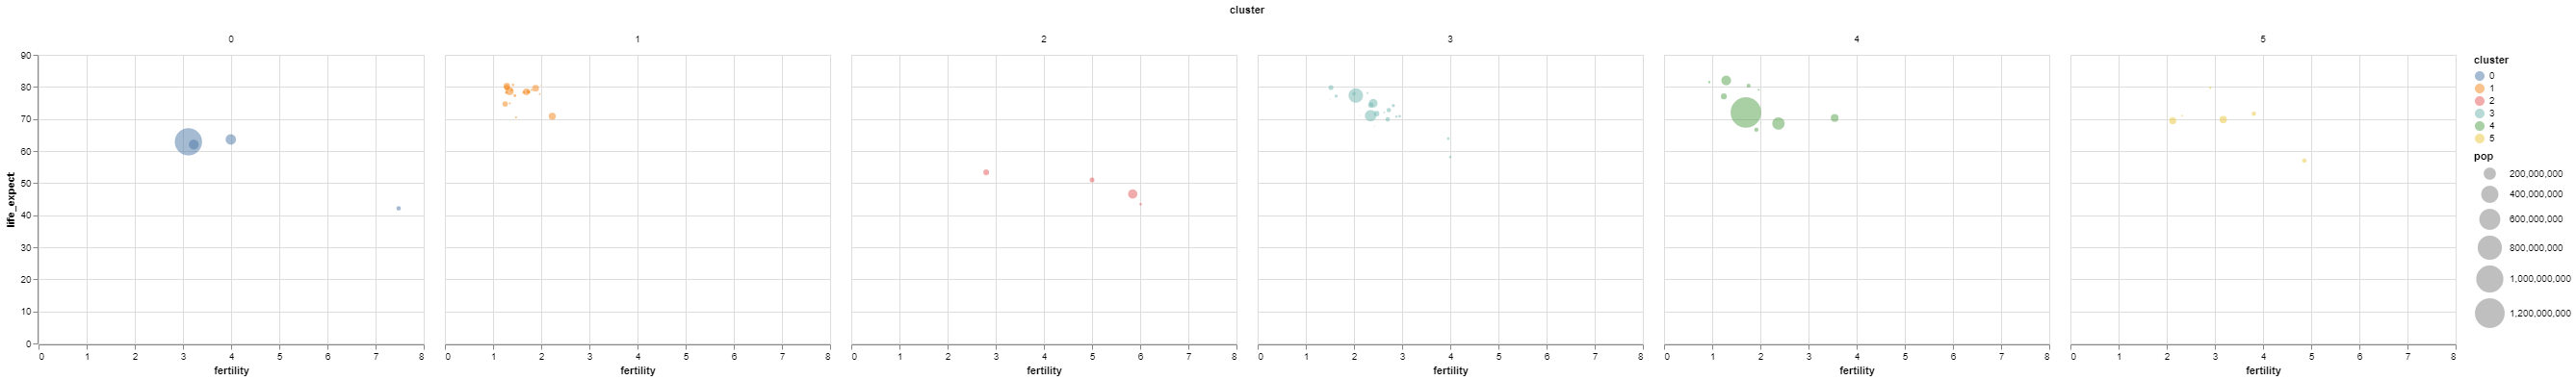

In [21]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N'),
    alt.OpacityValue(0.5),
    alt.Tooltip('country:N'),
    alt.Order('pop:Q', sort='descending'),
    alt.Column('cluster:N')
)

¡El gráfico anterior no encaja en la pantalla, lo que dificulta la comparación de todos los subgráficos entre sí! Podemos establecer las propiedades predeterminadas `width` y `height` para crear un conjunto de gráficos más pequeño. Además, como los encabezados de las columnas ya etiquetan los valores del `cluster`, vamos a eliminar nuestra leyenda de `color` poniéndola en `None`. Para hacer un mejor uso del espacio también podemos orientar nuestra leyenda `size` al fondo (`'bottom'`) de la gráfica.

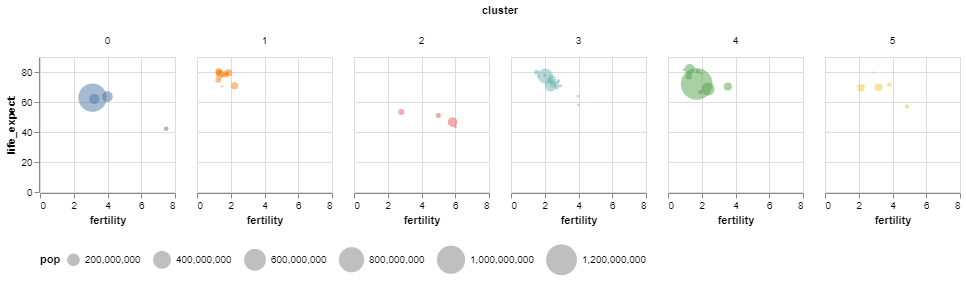

In [22]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000]),
             legend=alt.Legend(orient='bottom', titleOrient='left')),
    alt.Color('cluster:N', legend=None),
    alt.OpacityValue(0.5),
    alt.Tooltip('country:N'),
    alt.Order('pop:Q', sort='descending'),
    alt.Column('cluster:N')
).properties(width=135, height=135)

Debajo de la cubierta, las codificaciones `column` y `row` se traducen en una nueva especificación que utiliza el operador de composición de vista `facet`.¡Volveremos a examinar las facetas en mayor profundidad más adelante!

Mientras tanto, _¿puede reescribir la tabla de arriba para dividir en filas en lugar de columnas?_

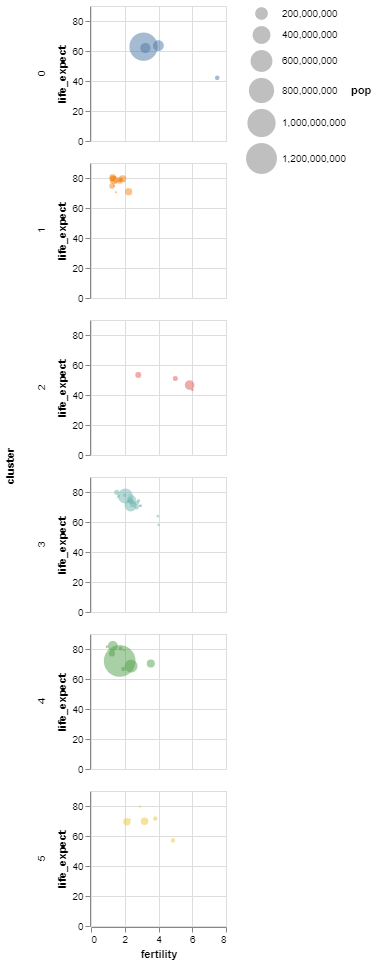

In [23]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000]),
             legend=alt.Legend(orient='right', titleOrient='right')),
    alt.Color('cluster:N', legend=None),
    alt.OpacityValue(0.5),
    alt.Tooltip('country:N'),
    alt.Order('pop:Q', sort='descending'),
    alt.Row('cluster:N')
).properties(width=135, height=135)

### Un vistazo al futuro: Filtrado interactivo

En módulos posteriores, profundizaremos en técnicas de interacción para la exploración de datos. He aquí un adelanto: enlazar un control deslizante de rango al campo `year` para permitir la búsqueda interactiva a través de cada año de los datos. No se preocupe si siguiente código es un poco confuso en este punto,ya que cubriremos la interacción en detalle más adelante.

_¡Arrastre el control deslizante de un lado a otro para ver cómo cambian los valores de los datos con el tiempo!_

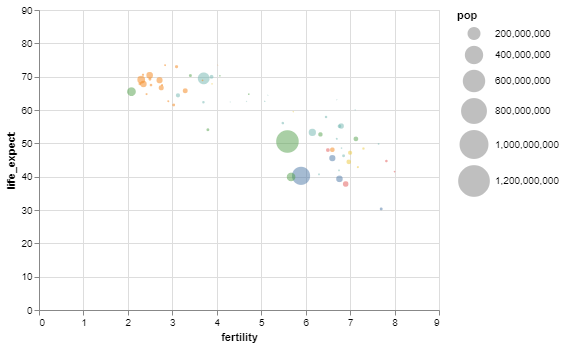

In [24]:
select_year = alt.selection_single(
    name='select', fields=['year'], init={'year': 1955},
    bind=alt.binding_range(min=1955, max=2005, step=5)
)

alt.Chart(data).mark_point(filled=True).encode(
    alt.X('fertility:Q', scale=alt.Scale(domain=[0,9])),
    alt.Y('life_expect:Q', scale=alt.Scale(domain=[0,90])),
    alt.Size('pop:Q', scale=alt.Scale(domain=[0, 1200000000], range=[0,1000])),
    alt.Color('cluster:N', legend=None),
    alt.OpacityValue(0.5),
    alt.Tooltip('country:N'),
    alt.Order('pop:Q', sort='descending')
).add_selection(select_year).transform_filter(select_year)

## Marcadores de gráficas (*Graphical Marks*)

Nuestra exploración de los canales de codificación anteriores utiliza exclusivamente marcas `point` para visualizar los datos. Sin embargo, el tipo de marca `point` es sólo una de las muchas formas geométricas que se pueden utilizar para representar visualmente los datos. Altair incluye una serie de tipos de marcas incorporadas, incluyendo:

- `mark_area()` - Áreas rellenas definidas por una línea superior y una línea base.
- `mark_bar()` -	Barras rectangulares.
- `mark_circle()`	- Gráficas de disperción con círculos rellenos.
- `mark_line()` - Segmentos de líneas conectados.
- `mark_point()` - Gráficas de dispersión con formas configurables.
- `mark_rect()` - Rectángulos rellenos, útiles para mapas de calor.
- `mark_rule()` - Líneas verticales u horizontales que abarcan el eje.
- `mark_square()` - Gráficas de dispersión con cuadrados rellenos.
- `mark_text()` - Gráficas de dispersión reporesentadas por texto.
- `mark_tick()` - Marcadores verticales u horizontales.	

Para obtener una lista completa y enlaces a ejemplos, consulte la documentación de [Altair marks](https://altair-viz.github.io/user_guide/marks.html). A continuación, repasaremos algunos de los tipos de marcadores más utilizados en los gráficos estadísticos.

### Marcadores de puntos

El tipo de marcadores `point` transmite puntos específicos, como en * gráficos de dispersión (scatter plots)* y *gráficos de puntos (dot plots)*. Además de los canales de codificación `x` y `y` (para especificar posiciones de puntos 2D), los marcadores de puntos pueden usar codificaciones de `color`, `size`, y `shape` para transmitir campos de datos adicionales.

A continuación se muestra un gráfico de puntos de `fertility`, con el campo `cluster` redundantemente codificado usando los canales `y` y `shape`. 

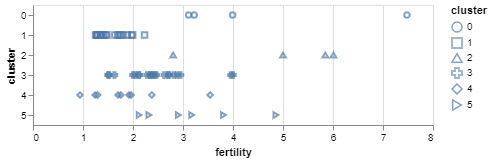

In [25]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:N'),
    alt.Shape('cluster:N')
)

Además de codificar canales, los marcadores pueden ser estilizados proporcionando valores a los métodos `mark_*()`.

Por ejemplo: los marcadores de puntos se dibujan con contornos trazados por defecto, pero se puede especificar que usen formas *rellenas (`filled`)* en su lugar. Del mismo modo, puede establecer un *tamaño (`size`)* predeterminado para establecer el área total de píxeles de la marca de punto.

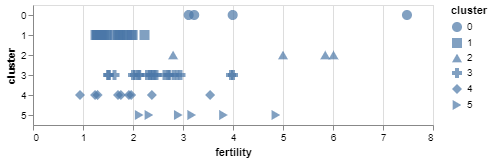

In [26]:
alt.Chart(data2000).mark_point(filled=True, size=100).encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:N'),
    alt.Shape('cluster:N')
)

### Marcadores de círculos

El tipo de marcador `circle` es una forma conveniente de referirse a las marcadores `point` dibujados como círculos rellenos.

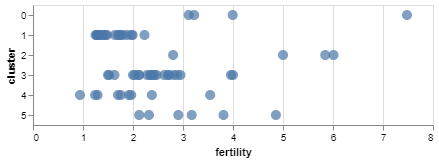

In [27]:
alt.Chart(data2000).mark_circle(size=100).encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:N'),
    alt.Shape('cluster:N')
)

### Marcadores cuadrados

El tipo de marcador `square` es una forma conveniente de referirse a los marcadores `point` dibujados como cuadrados rellenos.

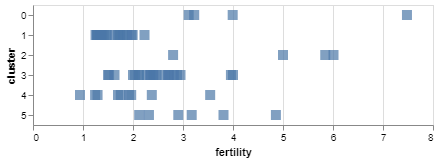

In [28]:
alt.Chart(data2000).mark_square(size=100).encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:N'),
    alt.Shape('cluster:N')
)

### Marcadores *Tick*

El tipo de marcador `tick` indica un punto de los datos utilizando un segmento de línea corto o "tick". Son especialmente útiles para comparar valores a lo largo de una dimensión con un traslape mínimo. Una *gráfica de puntos (dot plot)* dibujada con marcas de verificación a veces se denomina *gráfica de bandas (strip plot)*.

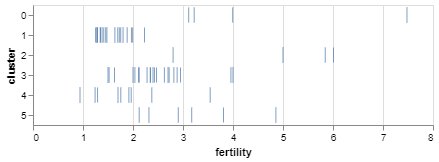

In [29]:
alt.Chart(data2000).mark_tick().encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:N'),
    alt.Shape('cluster:N')
)

### Marcadores de barra

El tipo de marcador \`bar\` dibuja un rectángulo con una posición, anchura y altura.

El gráfico siguiente es un simple gráfico de barras de la población (\`pop\`) de cada país.

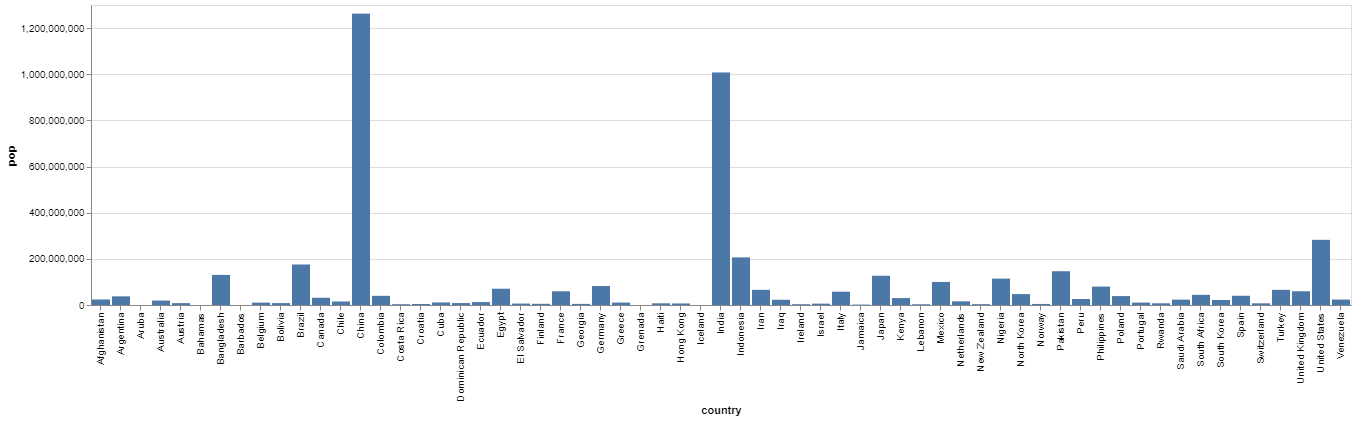

In [30]:
alt.Chart(data2000).mark_bar().encode(
    alt.X('country:N'),
    alt.Y('pop:Q')
)

El ancho de la barra se ajusta a un tamaño predefinido. Para cambiar el ancho, _intenta ajustar la propiedad \`rangeStep\` del atributo\`scale\` del canal\`x\`_. (En un módulo posterior veremos en detalle la configuración de ejes, escalas y leyendas.)

Las barras también se pueden apilar. Cambiemos la codificación `x` para usar el campo `cluster`, y codifiquemos `country` usando el canal `color`. También desactivaremos la leyenda (¡Que sería muy larga con colores para todos los países!) y usaremos `tooltip` para el nombre del país.

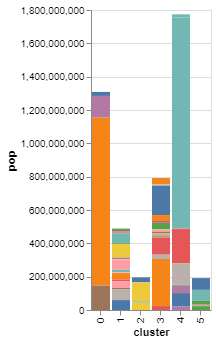

In [31]:
alt.Chart(data2000).mark_bar().encode(
    alt.X('cluster:N'),
    alt.Y('pop:Q'),
    alt.Color('country:N', legend=None),
    alt.Tooltip('country:N')
)

En el gráfico anterior, el uso del canal de codificación `color` hace que Altair / Vega-Lite apilen automáticamente los marcadores de barras. ¡De lo contrario, las barras se dibujarían una encima de la otra! Intenta añadir el parámetro `stack=None` al canal de codificación `y` para ver qué pasa si no aplicamos el apilamiento...

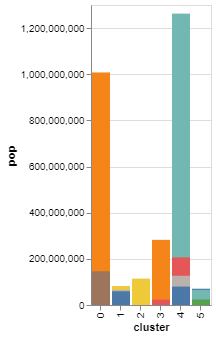

In [32]:
alt.Chart(data2000).mark_bar().encode(
    alt.X('cluster:N'),
    alt.Y('pop:Q', stack=None),
    alt.Color('country:N', legend=None),
    alt.Tooltip('country:N')
)

Los ejemplos anteriores crean gráficos de barras a partir de una línea de base cero, y el canal `y` sólo codifica el valor (o altura) distinto de cero de la barra. Sin embargo, el marcador de barra también le permite especificar puntos de inicio y final para transmitir rangos.

La siguiente gráfica utiliza los canales `x` (punto de inicio) y `x2` (punto final) para mostrar el rango de expectativas de vida dentro de cada grupo regional (*cluster*). A continuación utilizamos las funciones de agregación `min` y `max` para determinar los puntos finales del rango. ¡Discutiremos la agregación con más detalle en el siguiente *notebook*!

Alternativamente, puede usar `x` y `width` para proporcionar un punto de inicio más la compensación (*offset*), de manera que `x2 = x + width`.

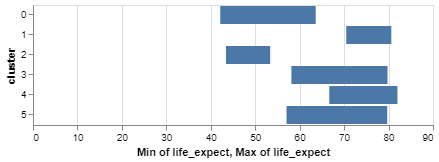

In [33]:
alt.Chart(data2000).mark_bar().encode(
    alt.X('min(life_expect):Q'),
    alt.X2('max(life_expect):Q'),
    alt.Y('cluster:N')
)

### Marcadores de líneas

El tipo de marcador `line` conecta puntos trazados con segmentos de línea, por ejemplo para que la pendiente de una línea transmita información sobre la tasa de cambio.

Tracemos un gráfico de líneas de la fecundidad por país a lo largo de los años, utilizando el *data frame* de desarrollo global completo. Volveremos a ocultar la leyenda y utilizaremos en su lugar `tooltip`.


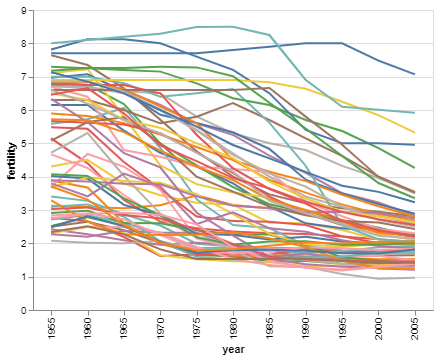

In [34]:
alt.Chart(data).mark_line().encode(
    alt.X('year:O'),
    alt.Y('fertility:Q'),
    alt.Color('country:N', legend=None),
    alt.Tooltip('country:N')
).properties(
    width=400
)

Podemos ver variaciones interesantes por país, pero tendencias generales en cuanto al menor número de hijos por familia a lo largo del tiempo. También tenga en cuenta que hemos establecido un ancho personalizado de 400 píxeles. _¡Trata de cambiar (o quitar) los anchos y verás lo que pasa!_

Cambiemos algunos de los parámetros por defecto de los marcadores para personalizar el gráfico. Podemos ajustar el `strokeWidth` para determinar el grosor de las líneas y la `opacity` para añadir algo de transparencia. Por defecto, el marcador `line` utiliza segmentos de línea recta para conectar los puntos de los datos. En algunos casos es posible que necesitemos suavizar las líneas. Podemos ajustar la interpolación utilizada para conectar los puntos de los datos estableciendo el parámetro del marcador `interpolate`. Usemos la interpolación monótona (`'monotone'`) para proporcionar líneas suaves que también garanticen que no se generen involuntariamente valores mínimos o máximos "falsos" como resultado de la interpolación.

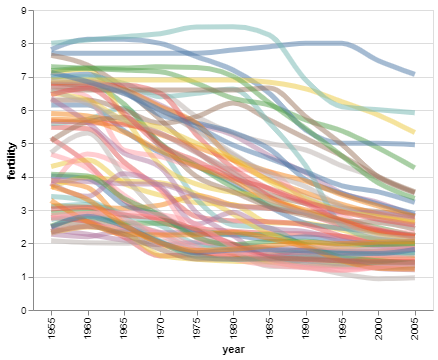

In [35]:
alt.Chart(data).mark_line(
    strokeWidth=5,
    opacity=0.5,
    interpolate='monotone'
).encode(
    alt.X('year:O'),
    alt.Y('fertility:Q'),
    alt.Color('country:N', legend=None),
    alt.Tooltip('country:N')
).properties(
    width=400
)

El marcador `line` también puede usarse para crear *gráficos de pendientes (slope graphs)*, gráficas que resaltan el cambio de valor entre dos puntos de comparación usando pendientes de líneas.

A continuación vamos a crear un gráfico de pendiente comparando las poblaciones de cada país en años mínimos y máximos de nuestro conjunto de datos completo: 1955 y 2005. Primero creamos un nuevo *data frame* filtrado para esos años, y luego usamos Altair para crear el gráfico de pendiente.

Por defecto, Altair coloca los años muy juntos. Para espaciar mejor los años a lo largo del eje x, podemos usar el parámetro `rangeStep` de la propiedad `scale` para indicar el tamaño (en píxeles) de los pasos discretos a lo largo del rango del eje x. Intente ajustar el `rangeStep` a continuación y vea cómo cambia el gráfico.

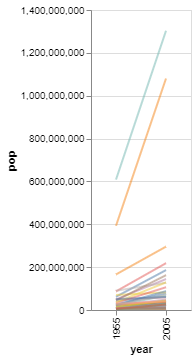

In [36]:
dataTime = data.loc[(data['year'] == 1955) | (data['year'] == 2005)]

alt.Chart(dataTime).mark_line(opacity=0.5).encode(
    alt.X('year:O', scale=alt.Scale(rangeStep=50)),
    alt.Y('pop:Q'),
    alt.Color('country:N', legend=None),
    alt.Tooltip('country:N')
)

### Marcadores de Área

El tipo de marcador `area` combina aspectos de los marcadores `line` y `bar`: visualiza las conexiones (pendientes) entre puntos de los datos, pero también muestra una región rellena, con un borde por defecto a una línea base de valor cero.

La siguiente gráfica es una gráfica de área de la población de los Estados Unidos en el tiempo:

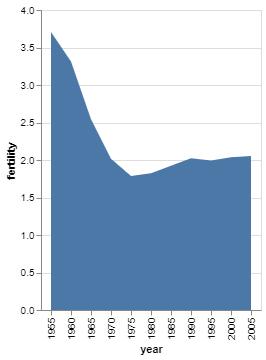

In [37]:
dataUS = data.loc[data['country'] == 'United States']

alt.Chart(dataUS).mark_area().encode(
    alt.X('year:O'),
    alt.Y('fertility:Q')
)

De manera similar al marcador `line`, el marcador `area` admite un parámetro `interpolate`.

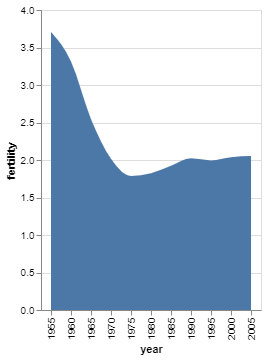

In [38]:
alt.Chart(dataUS).mark_area(interpolate='monotone').encode(
    alt.X('year:O'),
    alt.Y('fertility:Q')
)

Al igual que los marcadores `bar`, los marcadores `area` también admiten el apilamiento. Aquí creamos un nuevo *data frame* con datos para los tres países de América del Norte, y luego los graficamos usando un marcador del tipo `area` y un canal de codificación de `color` para apilar por país.

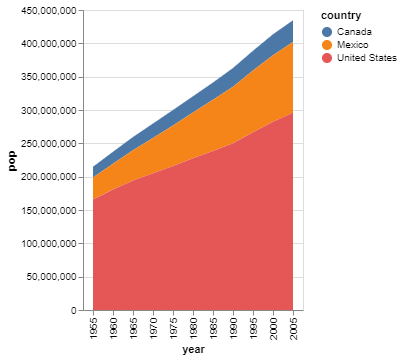

In [39]:
dataNA = data.loc[
    (data['country'] == 'United States') |
    (data['country'] == 'Canada') |
    (data['country'] == 'Mexico')
]

alt.Chart(dataNA).mark_area().encode(
    alt.X('year:O'),
    alt.Y('pop:Q'),
    alt.Color('country:N')
)

Por defecto, el apilamiento se realiza en relación con una línea de base cero. Sin embargo, hay otras opciones de `stack` disponibles:

* `center` - para apilar relativo a una línea de base en el centro del gráfico, creando una visualización *streamgraph*, y
* `normalize` - para normalizar los datos sumados en cada punto de apilamiento a 100%, permitiendo comparaciones porcentuales.

A continuación adaptamos el gráfico estableciendo el atributo `stack` de`y` `center`.

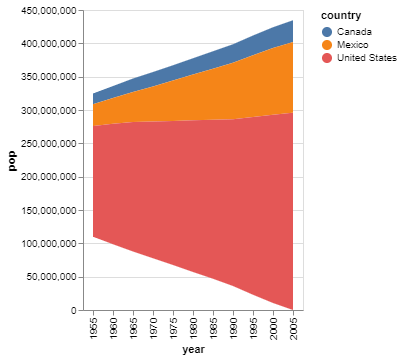

In [40]:
alt.Chart(dataNA).mark_area().encode(
    alt.X('year:O'),
    alt.Y('pop:Q', stack='center'),
    alt.Color('country:N')
)

¿Qué pasa si en su lugar lo configuras `normalize`?

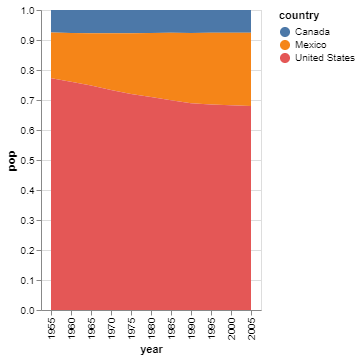

In [41]:
alt.Chart(dataNA).mark_area().encode(
    alt.X('year:O'),
    alt.Y('pop:Q', stack='normalize'),
    alt.Color('country:N')
)

Para deshabilitar el apilamiento por completo, configure el atributo `stack` en `None`. 
¡También podemos añadir `opacity` como parámetro por defecto del marcador para asegurarnos de ver las áreas superpuestas!

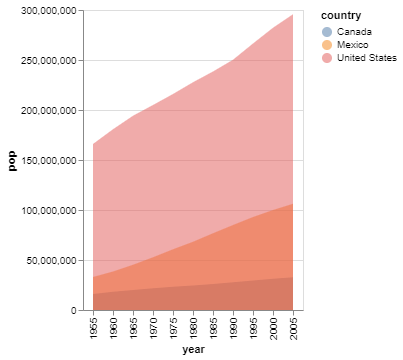

In [42]:
alt.Chart(dataNA).mark_area(opacity=0.5).encode(
    alt.X('year:O'),
    alt.Y('pop:Q', stack=None),
    alt.Color('country:N')
)

El tipo de marcador `area` también admite líneas de base basadas en los datos, con las series superior e inferior determinadas por los datos de campo. Al igual que con los marcadores `bar`, podemos usar los canales `x` y `x2` (o `y` y `y2`) para proporcionar puntos finales para los marcadores de área.

La siguiente gráfica visualiza el rango de fertilidad mínima y máxima, por año, para los países de América del Norte:

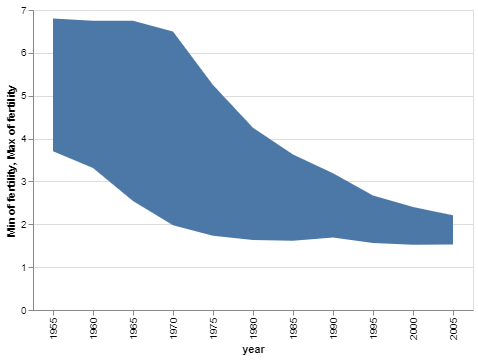

In [43]:
alt.Chart(dataNA).mark_area().encode(
    alt.X('year:O', scale=alt.Scale(rangeStep=40)),
    alt.Y('min(fertility):Q'),
    alt.Y2('max(fertility):Q')
)

Podemos ver una gama más amplia de valores en 1995, de un poco menos de 4 a levemente abajo de 7. En 2005, tanto los valores de fecundidad como la variabilidad han disminuido, centrándose en 2 niños por familia.

Todos los ejemplos de marcadores de tipo `area` anteriores utilizan un área orientada verticalmente. Sin embargo, Altair y Vega-Lite también soportan áreas orientadas horizontalmente. Transpongamos el gráfico anterior, simplemente intercambiando los canales `x` y `y`.

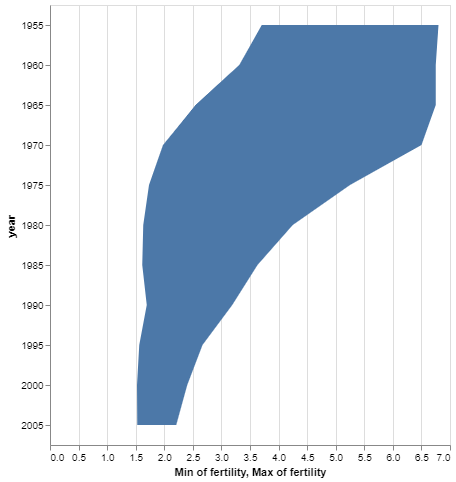

In [44]:
alt.Chart(dataNA).mark_area().encode(
    alt.Y('year:O', scale=alt.Scale(rangeStep=40)),
    alt.X('min(fertility):Q'),
    alt.X2('max(fertility):Q')
)

## Resumen

¡Hemos completado nuestro recorrido de tipos de datos, canales de codificación y marcadores gráficos!
Ahora debería estar bien equipado para explorar más a fondo el campo de las codificaciones, tipos y parámetros de los marcadores. Para una referencia completa &ndash; ¡Incluyendo las características que hemos omitido aquí! &ndash; vea la documentación de Altair sobre [marcadores](https://altair-viz.github.io/user_guide/marks.html) y [codificación](https://altair-viz.github.io/user_guide/encoding.html).

En el siguiente módulo, veremos el uso de las transformaciones de datos para crear gráficos que resumen los datos o muestran nuevos campos derivados. En un módulo posterior, examinaremos cómo personalizar aún más sus gráficos modificando escalas, ejes y leyendas.

¿Te interesa saber más sobre la codificación visual?

<img title="Bertin's Taxonomy of Visual Encoding Channels" src="https://cdn-images-1.medium.com/max/2000/1*jsb78Rr2cDy6zrE7j2IKig.png" style="max-width: 650px;"><br/>

<small>Taxonomia de Bertin's de la codificación visual de <a href="https://books.google.com/books/about/Semiology_of_Graphics.html?id=X5caQwAACAAJ"><em>Sémiologie Graphique</em></a>, adaptada por <a href="https://bost.ocks.org/mike/">Mike Bostock</a>.</small>

- El estudio sistemático de maracadores, codificaciones visuales y tipos de datos de respaldo fue iniciado por was initiated by [Jacques Bertin](http://es.knowledger.de/00215301/JacquesBertin) en su obra pionea de 1967[_Sémiologie Graphique (La semiología de la Gráfica)_](https://books.google.com/books/about/Semiology_of_Graphics.html?id=X5caQwAACAAJ). La imagen anterior ilustra la posición (*position*), el tamaño (*size*), el valor de brillo (*value*), la textura (*texture*), el color/tono, la orientación (+orientation*) y los canales de forma (*shape*), junto con las recomendaciones de Bertin para los tipos de datos que admiten.
- El marco de tipos de datos, marcadores y canales también guía las herramientas _automatizadas_ de diseño de visualización, iniciando con [Mackinlay's APT (A Presentation Tool)](https://scholar.google.com/scholar?cluster=10191273548472217907) en 1986 y continuando en sistemas más recientes como  systems such as [Voyager](http://idl.cs.washington.edu/papers/voyager/) y [Draco](http://idl.cs.washington.edu/papers/draco/).
- La identificación de los tipos de datos nominales, orinales, intervalos y proporcionales se remontal al menos hasta el artículo de 1947 de S. S. Steven's [_On the theory of scales of measurement_](https://scholar.google.com/scholar?cluster=14356809180080326415).